In [1]:
import pandas as pd 
import os 
from sklearn.metrics.pairwise import cosine_similarity
os.chdir("/Users/nicolaslonguetmarx/Dropbox/StateLaws/")

/Users/nicolaslonguetmarx/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
census_econ = pd.read_csv("2_data/2_intermediate/employment_data/detailed_employment_data.csv")
census_econ = census_econ.rename(columns={'STATE':'statename', 'YEAR':'year'})
census_econ_pre_1880 = pd.read_csv("2_data/2_intermediate/employment_data/pre1900_employment_data.csv")
census_econ_pre_1880= census_econ_pre_1880[census_econ_pre_1880['year']<1880]
census_econ = pd.concat([census_econ, census_econ_pre_1880], axis = 0 )
census_econ.columns

Index(['statename', 'year', 'agricultural_laborers', 'agricultural_pursuits',
       'agriculture', 'agriculture_forestry_animal_husb', 'boot_shoe_makers',
       'building_grounds_maintenance', 'business_repair_services', 'clergymen',
       'clerks_salesmen_accountants', 'construction',
       'cotton_silk_woolen_mill_ops', 'craftsmen', 'domestic_servants',
       'engaged_agriculture', 'entertainment', 'farm_laborers_forement',
       'farmers_farm_managers', 'farmers_planters', 'finance_insur_realestate',
       'food_preparation_serving', 'forestry_fishing:', 'govt_employees',
       'handlers_equipmentcleaners_helpers_laborers', 'healthcare_support',
       'household_workers', 'installation_maintenance_repair',
       'iron_steel_workers', 'laborers', 'lawyers',
       'machine_ops_assemblers_inspectors', 'managers_administrators',
       'manufacturers_officials_manufacturing_companies', 'manufacturing',
       'manufacturing_mechanical', 'manufacturing_mechanical_mining_indust

In [21]:
census_econ.loc[census_econ['year']==2000, ].isna().all()[:60]

statename                                          False
year                                               False
agricultural_laborers                               True
agricultural_pursuits                               True
agriculture                                        False
agriculture_forestry_animal_husb                    True
boot_shoe_makers                                    True
building_grounds_maintenance                       False
business_repair_services                            True
clergymen                                           True
clerks_salesmen_accountants                        False
construction                                       False
cotton_silk_woolen_mill_ops                         True
craftsmen                                           True
domestic_servants                                   True
engaged_agriculture                                 True
entertainment                                       True
farm_laborers_forement         

/Users/nicolaslonguetmarx/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='agriculture', ylabel='Density'>

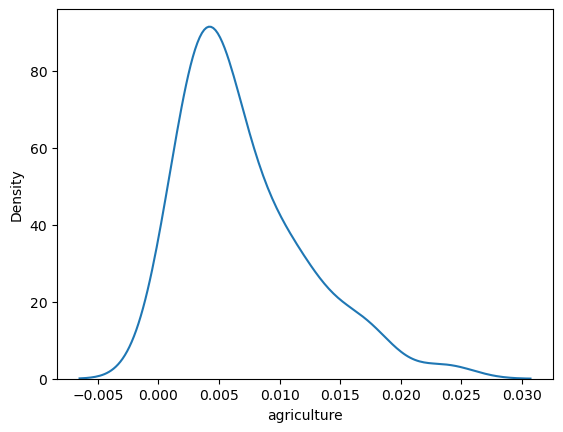

In [23]:
import seaborn as sns 
sns.kdeplot(census_econ[census_econ['year']==2000])

In [46]:
census_econ[census_econ['year']==2000].professional_specialty.describe()

count    51.000000
mean      0.199640
std       0.028242
min       0.142010
25%       0.182470
50%       0.193899
75%       0.214367
max       0.323149
Name: professional_specialty, dtype: float64

In [45]:
census_econ[census_econ['year']==2000].iloc[:, 40:50].mean()

operatives                             NaN
personal_services                 0.029280
production                        0.082966
professional_personal_services         NaN
professional_services                  NaN
professional_specialty            0.199640
professional_technical_kindred         NaN
protectice_services               0.018717
railroad_employees                     NaN
sailors_boatmen_watermen               NaN
dtype: float64

In [47]:
for yr in range(1880, 2010, 10):
    if (yr!=1960) and (yr!=1890) and (yr!=1910):
        print(yr)
        year_data = census_econ[census_econ['year']==yr]
        year_data = year_data.dropna(axis=1, how='all')
        
        list_col = list(year_data.columns)
        list_col.remove('statename')
        list_col.remove('year')
        
        year_data = year_data[year_data[list_col[0]].isna()==False] 
        census_sectors_data = year_data[list_col]
        # remove missing columns 
#         census_sectors_data = census_sectors_data[list(census_sectors_data.columns[census_sectors_data.isnull().any()==False])]
        similarity = cosine_similarity(census_sectors_data, census_sectors_data)
        sim_data = pd.DataFrame(similarity)
        sim_data.columns = list(year_data[['statename', 'year']].statename)
        sim_data = year_data[['statename', 'year']].reset_index(drop=True).merge(sim_data, left_index=True, right_index=True) 
        sim_data.to_csv("2_data/2_intermediate/employment_data/census_sim_"+str(yr)+".csv", index=False)
        
        

1880
1900
1920
1930
1940
1950
1970
1980
1990
2000


In [52]:
sim_data

,statename,year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Alabama,2000,1.000000,0.963549,0.976370,0.996726,0.979027,0.967127,0.970555,0.977121,...,0.980275,0.998650,0.985763,0.987085,0.982305,0.973946,0.978489,0.989868,0.994611,0.972657
1,Alaska,2000,0.963549,1.000000,0.991410,0.947625,0.988268,0.990874,0.982831,0.993767,...,0.978132,0.958729,0.990043,0.987266,0.981989,0.989263,0.991972,0.977950,0.956654,0.985821
2,Arizona,2000,0.976370,0.991410,1.000000,0.963818,0.993725,0.994995,0.986979,0.996102,...,0.989383,0.973585,0.997825,0.997169,0.985416,0.990310,0.994228,0.983861,0.969811,0.988298
3,Arkansas,2000,0.996726,0.947625,0.963818,1.000000,0.967461,0.952051,0.956195,0.965337,...,0.977531,0.998469,0.975138,0.977139,0.969928,0.959972,0.966239,0.982345,0.994947,0.963111
4,California,2000,0.979027,0.988268,0.993725,0.967461,1.000000,0.995620,0.997183,0.997240,...,0.991585,0.977014,0.996590,0.994386,0.995313,0.997800,0.998772,0.976895,0.979310,0.977459
5,Colorado,2000,0.967127,0.990874,0.994995,0.952051,0.995620,1.000000,0.994116,0.995776,...,0.986275,0.964019,0.995229,0.991832,0.989167,0.996785,0.996732,0.972285,0.963982,0.982677
6,Connecticut,2000,0.970555,0.982831,0.986979,0.956195,0.997183,0.994116,1.000000,0.993400,...,0.984580,0.968085,0.991084,0.987982,0.995074,0.998213,0.995453,0.965358,0.973657,0.966316
7,Delaware,2000,0.977121,0.993767,0.996102,0.965337,0.997240,0.995776,0.993400,1.000000,...,0.991782,0.975922,0.997068,0.996353,0.990949,0.996016,0.997070,0.979653,0.976771,0.982156
8,District Of Columbia,2000,0.881717,0.951322,0.931161,0.854627,0.950179,0.953754,0.961541,0.947407,...,0.915807,0.875712,0.930984,0.922444,0.949813,0.960333,0.950388,0.889736,0.889396,0.906670
9,Florida,2000,0.972598,0.986696,0.998363,0.961434,0.989928,0.991150,0.981257,0.991801,...,0.988156,0.970226,0.995206,0.994410,0.977880,0.984242,0.990303,0.982243,0.964914,0.985910
